<a href="https://colab.research.google.com/github/Ad7amstein/Linear_Regression-E-commerce/blob/main/ecommerce_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import copy, math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data set
url = 'https://raw.githubusercontent.com/Ad7amstein/Linear_Regression-E-commerce/main/Ecommerce%20Customers.csv'
data = pd.read_csv(url)

In [3]:
from sklearn.model_selection import train_test_split

In [6]:
X = data[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = data['Yearly Amount Spent']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [16]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['coef'])
cdf

,coef
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


In [19]:
predections = lm.predict(X_test)
predections

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Text(0.5, 1.0, 'Model Evaluation')

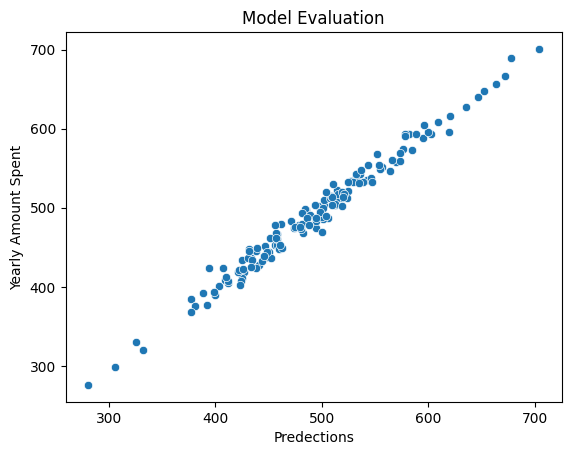

In [25]:
sns.scatterplot(x=predections, y=y_test)
plt.xlabel('Predections')
plt.title("Model Evaluation")

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [28]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predections))
print("Mean Squared Error: ", mean_squared_error(y_test, predections))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predections)))

Mean Absolute Error:  8.426091641432116
Mean Squared Error:  103.91554136503333
RMSE:  10.193897260863155


In [31]:
# residuals
residuals = y_test - predections
residuals

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

## Test for normality

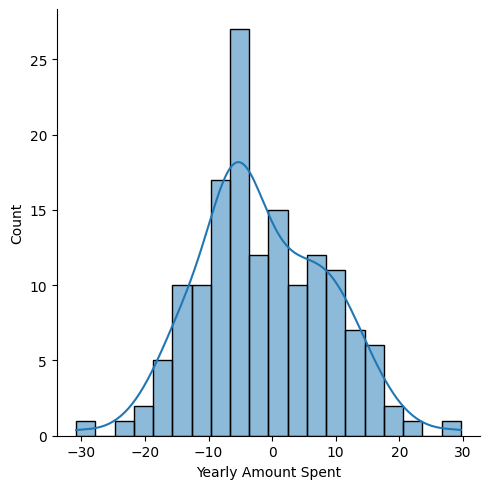

In [35]:
sns.displot(residuals, bins=20, kde=True)

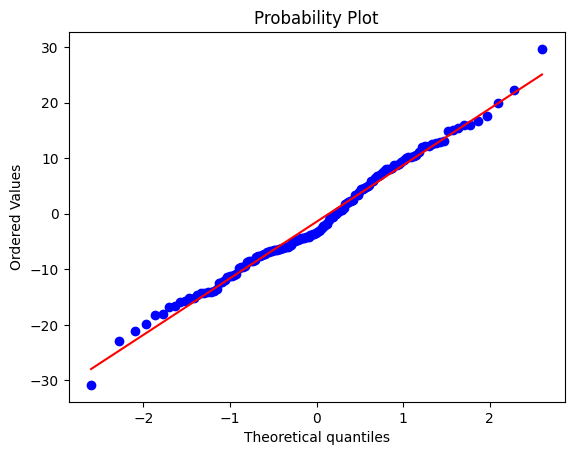

In [37]:
import pylab
import scipy.stats as stats

stats.probplot(residuales, dist="norm", plot=pylab)
pylab.show()

In [39]:
lm.score(X_test, y_test)

0.9808757641125855